In [245]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import awkward as ak

In [254]:
# filename = r"C:\Users\lobis\git\FeminosDAQ\examples\events_new_mclient.root"
filename = r"C:\Users\lobis\git\FeminosDAQ\examples\events_trex_noise.root"

file = uproot.open(filename)

print(file.keys())

tree = file["events"]

print(tree.keys())

['events;1', 'run;1']
['timestamp', 'signal_ids', 'signal_data']


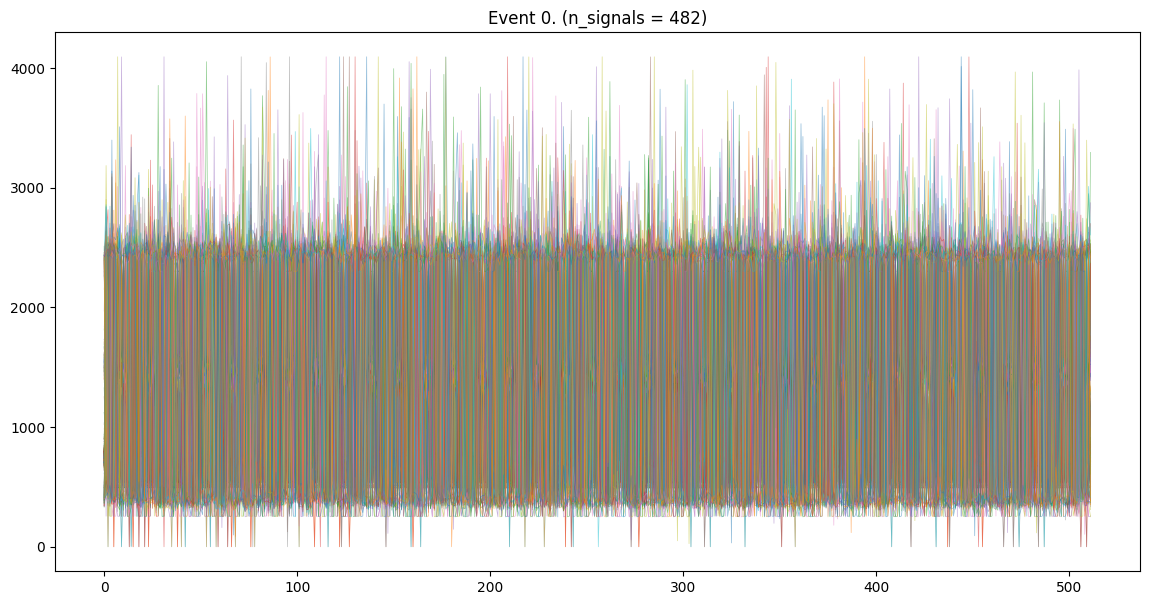

In [264]:
count = 0
n_to_draw = 1

for events in tree.iterate(step_size=5):
    events["signal_data"] = ak.unflatten(events["signal_data"], 512, axis=1)

    # signals is a record with fields 'id' and 'data'
    signals = ak.Array({"id": events["signal_ids"], "data": events["signal_data"]})
    events["signals"] = signals

    events = ak.without_field(events, "signal_ids")
    events = ak.without_field(events, "signal_data")

    # this section is very slow, but it provides the shape I like. TODO: find a faster way
    # events["signals"] = ak.Array([ak.Array([ak.Record({"id": event.signal_ids[i], "data": event.signal_data[i]}) for i in range(len(event.signal_ids))]) for event in events], with_name="Signal")

    for event in events:
        plt.figure(figsize=(14, 7))
        # draw all signals
        for id, data in zip(event.signals.id, event.signals.data):
            plt.plot(data, label=f"Signal {id}", alpha=0.5, linewidth=0.5)

        plt.title(f"Event 0. (n_signals = {len(event.signals.id)})")
        plt.show()

        count += 1

        if count >= n_to_draw:
            break

    if count >= n_to_draw:
        break

In [270]:
# read the 100th position of the ttree
events = tree.arrays(entry_start=100, entry_stop=101)

In [271]:
events

<Array [{timestamp: 1723920115893, ...}] type='1 * {timestamp: int64, signa...'>

In [290]:
def get_event(tree: uproot.TTree, entry: int):
    if entry >= tree.num_entries:
        raise ValueError(
            f"Entry {entry} is out of bounds. Tree has {tree.num_entries} entries."
        )

    events = tree.arrays(entry_start=entry, entry_stop=entry + 1)
    events["signal_data"] = ak.unflatten(events["signal_data"], 512, axis=1)

    signals = ak.Array(
        {"id": events["signal_ids"], "data": events["signal_data"]}, with_name="Signals"
    )
    events["signals"] = signals

    events = ak.without_field(events, "signal_ids")
    events = ak.without_field(events, "signal_data")

    return events[0]


event = get_event(tree, 100)

event

<Record {timestamp: 1723920115893, ...} type='{timestamp: int64, signals: S...'>

In [294]:
# print number of entries in tree
tree.num_entries

11280

In [283]:
event

<Array [{timestamp: 1723920115893, ...}] type='1 * {timestamp: int64, signa...'>